In [116]:
%matplotlib inline
import seaborn as sns

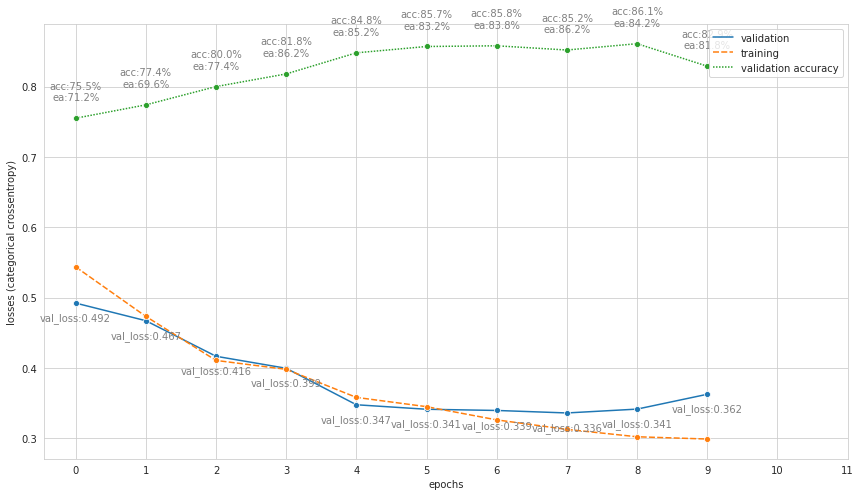

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import json
_data = None
sns.set_style("whitegrid")
with open("./training_cycle.json", "r") as f:
    _data = json.loads(f.read())
trg = _data["training_losses"]
data = _data["validation_losses"]
acc = np.round(_data["validation_accuracy"],3).tolist()
evid = np.round(_data["evidence_accuracy"],4)
labels = len(data)
width = len(data)
if (width < 12):
    width = 12
plt.figure(figsize=(width*1.2, 8))
ticks = range(width)
while (len(data) < width):
    data.append(None)
    trg.append(None)
    acc.append(None)
#acc = np.round(acc, 3)
import pandas as pd
df = pd.DataFrame({
    "validation":data,
    "training":trg,
    "validation accuracy":acc
})
sizes = {
    "validation":1,
    "training":5,
    "validation accuracy":1
}
g = sns.lineplot(data=df, marker="o", hue="event", style="choice")
g.set(xticks = range(len(data)))
g.set(xlabel = "epochs")
axes = g.axes
#axes.set_ylim(0.3, 1)
g.set(ylabel = "losses (categorical crossentropy)")
for i in range(labels):
    g.text(i, data[i]-0.025, 
           "val_loss:" + str(np.round([data[i]], 3)[0]),  
           horizontalalignment='center', 
           size='medium', 
           color='gray', weight='light')
    g.text(i, acc[i]+0.025,
          "acc:" + str(np.round(acc[i]*100,2)) + "%" + "\nea:" + str(np.round(evid[i]*100,2)) + "%",
          horizontalalignment='center',
          color="gray", weight="light")